In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

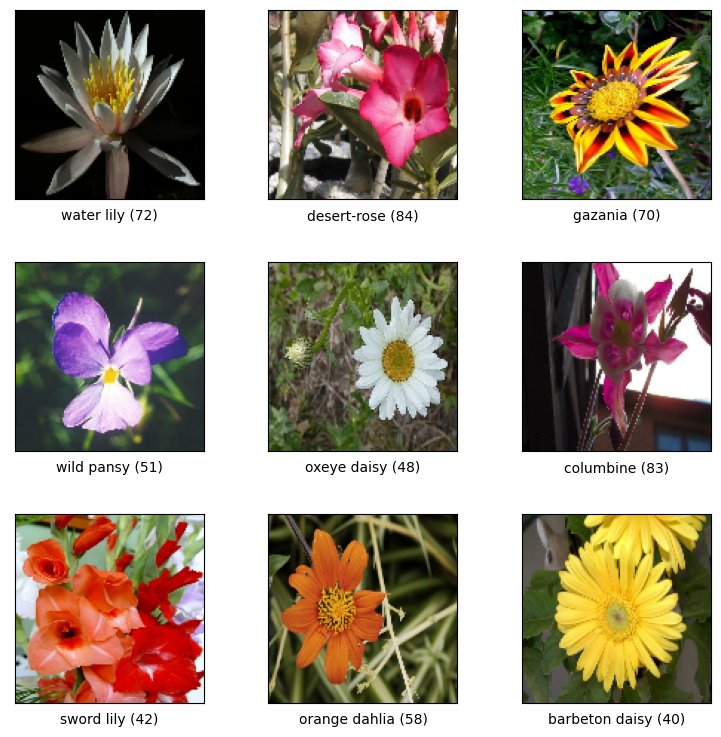

In [34]:
#Load the training and testing dataset
(ds_train, ds_test), ds_info = tfds.load('oxford_flowers102', split=['train', 'test'], with_info=True, as_supervised=True)
#Visualise some of the items in the dataset
#tfds.as_dataframe(ds_train.take(4), ds_info)

#This gets the images ready 
shape = (128, 128, 3)
n_labels = 102
def normalize_img(img, label):
    img = tf.image.resize(img,shape[:2])
    img = tf.cast(img, tf.float32) / 255
    return img, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
tfds.visualization.show_examples(ds_train, ds_info)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(1000)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.prefetch(AUTOTUNE)

In [35]:
#Making the NN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=shape),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(n_labels, activation="softmax")]
)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [36]:
#Train the model 
history = model.fit(ds_train, epochs=10)

Epoch 1/10
16/16 [==============================] - 9s 480ms/step - loss: 5.0064 - accuracy: 0.0098
Epoch 2/10
16/16 [==============================] - 8s 494ms/step - loss: 4.5479 - accuracy: 0.0265
Epoch 3/10
16/16 [==============================] - 8s 511ms/step - loss: 4.3804 - accuracy: 0.0422
Epoch 4/10
16/16 [==============================] - 8s 520ms/step - loss: 4.0942 - accuracy: 0.0824
Epoch 5/10
16/16 [==============================] - 8s 522ms/step - loss: 3.6837 - accuracy: 0.1667
Epoch 6/10
16/16 [==============================] - 8s 530ms/step - loss: 3.1167 - accuracy: 0.2755
Epoch 7/10
16/16 [==============================] - 9s 546ms/step - loss: 2.4398 - accuracy: 0.4294
Epoch 8/10
16/16 [==============================] - 9s 556ms/step - loss: 1.7113 - accuracy: 0.6020
Epoch 9/10
16/16 [==============================] - 9s 558ms/step - loss: 1.1645 - accuracy: 0.7284
Epoch 10/10
16/16 [==============================] - 9s 553ms/step - loss: 0.5831 - accuracy: 0.8843